In [ ]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.112915
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.283928
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.198540


In [ ]:
df.shape

(2003, 6)

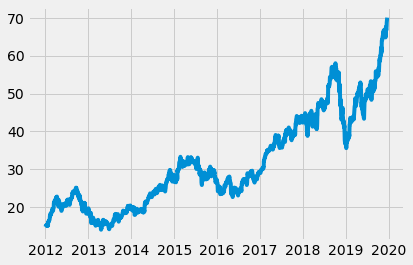

In [ ]:

plt.plot(df['Close'])

In [ ]:
df1=df.reset_index()['Close']
df1

0       14.686786
1       14.765714
2       14.929643
3       15.085714
4       15.061786
          ...    
1998    67.692497
1999    67.864998
2000    68.787498
2001    69.964996
2002    70.102501
Name: Close, Length: 2003, dtype: float64

In [ ]:
df1.shape

(2003,)

In [ ]:
df1=np.array(df1).reshape(-1,1)

In [ ]:
df1.shape

(2003, 1)

In [ ]:
df1

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [68.78749847],
       [69.96499634],
       [70.10250092]])

In [ ]:
scalar=MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(df1)


In [ ]:
df1

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
# split b/w test data and train data
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]



In [ ]:
train_data.shape

(1301, 1)

In [ ]:
test_data.shape

(702, 1)

In [ ]:
# Timeseries data

def create_data (data, time_step=1):
  data1,data2= [], []
  for i in range(len(data)-time_step-1):
    a = data[i:(i+time_step),0]
    data1.append(a)
    data2.append(data[i+time_step,0])
  return np.array(data1), np.array(data2)
  

In [ ]:
time_step=100
x_train, y_train= create_data(train_data,time_step)

In [ ]:
x_train.shape

(1200, 100)

In [ ]:
y_train

array([0.10923845, 0.11558567, 0.11997404, ..., 0.37396488, 0.37026981,
       0.37392038])

In [ ]:
x_test, y_test =create_data(test_data,time_step)

In [ ]:
x_test.shape

(601, 100)

In [ ]:
y_test.shape

(601,)

In [ ]:
# reshape
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 9s 243ms/step - loss: 0.0128 - val_loss: 0.0193
Epoch 2/100
19/19 [==============================] - 3s 178ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 3/100
19/19 [==============================] - 3s 176ms/step - loss: 4.7369e-04 - val_loss: 0.0027
Epoch 4/100
19/19 [==============================] - 3s 178ms/step - loss: 3.8137e-04 - val_loss: 0.0021
Epoch 5/100
19/19 [==============================] - 3s 180ms/step - loss: 3.7855e-04 - val_loss: 0.0025
Epoch 6/100
19/19 [==============================] - 3s 182ms/step - loss: 3.6216e-04 - val_loss: 0.0021
Epoch 7/100
19/19 [==============================] - 3s 178ms/step - loss: 3.5387e-04 - val_loss: 0.0025
Epoch 8/100
19/19 [==============================] - 3s 184ms/step - loss: 3.5816e-04 - val_loss: 0.0026
Epoch 9/100
19/19 [==============================] - 3s 180ms/step - loss: 3.3717e-04 - val_loss: 0.0032
Epoch 10/100
19/19 [==============================] - 3s 180ms/

In [ ]:
# Let do the prediction and check performance matrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)


In [ ]:
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [ ]:
#### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))


1384.2966620070827

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))


2663.4189512007138

In [ ]:
## Map
